# Logistic Regression Example

The main package for machine learning in Python is **scikit-learn**.

Further reading:
- [scikit-learn](https://scikit-learn.org) (Machine Learning libraries)

In addition, we will be using the following libraries:
- Data management
    - [numpy](https://numpy.org/) (linear algebra)
    - [pandas](https://pandas.pydata.org/) (data processing, CSV file)

- Plotting
    - [seaborn](https://seaborn.pydata.org/)
    - [matplotlib](https://matplotlib.org/)

In [1]:
# Import necessary modules
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,OneHotEncoder
from sklearn.metrics import (accuracy_score, confusion_matrix, 
                             roc_auc_score, roc_curve, confusion_matrix, 
                             ConfusionMatrixDisplay, classification_report
                            )
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV

import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

# Interactive plotting
%matplotlib inline
%config InlineBackend.figure_format = 'svg' # ‘png’, ‘retina’, ‘jpeg’, ‘svg’, ‘pdf’

### 1. Our data

#### Create syntethic dataset

`make_classification` is used to create synthetic datasets. 

`np.random.choice` is used, in this case, to create a categorical variable to show how it should be treat and preprocessing.

In [2]:
# Create array X,y 
X, y = make_classification(
    n_samples=1000, # 1000 observations 
    n_features=4, # 4 total features
    n_informative=4, # 4 'useful' features
    n_redundant=0, # there is no redundant features
    n_classes=2, # binary target/label 
    random_state=999 # seed to reproducibility
)

# Get columns name
columns = ["numerical_var_"+str(i) for i in range(0,4)]

# Transform to dataframe
df = pd.DataFrame(X,columns = columns)

# Create categorical column
np.random.seed(444) 
categorical = np.random.choice(a=[0, 1, 2],size=df.shape[0],p=[0.5, 0.3, 0.2])  

# Create high correlate column
df["numerical_var_"+str(X.shape[1])] = 2*df["numerical_var_0"]

# Add categorical var and target
df["categorical_var_1"] = categorical
df["Y"] = y

In [3]:
df.head(5)

,numerical_var_0,numerical_var_1,numerical_var_2,numerical_var_3,numerical_var_4,categorical_var_1,Y
0,0.351676,-1.301084,-1.339434,1.265830,0.703352,2,0
1,0.675244,0.993143,-0.660264,0.878395,1.350487,2,0
2,0.523281,-2.062535,-2.495720,-0.240051,1.046562,1,0
3,0.238276,-2.234409,-0.725584,1.000798,0.476552,1,1
4,-2.626816,-0.012845,3.551224,-2.096212,-5.253631,0,1


### 2. Split data intro train/test

#### Define feature and target matrix

In [4]:
features = list(df.columns)
target = 'Y'
features.remove(target)

In [5]:
X = df[features]
y = df[target]

#### Split
Based on [train_test_split](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html) create X_train,X_test,y_train and y_test where:
- test_size = 0.2 (percentage of test data)
- random_state = 0 (seed for replication)
- stratify = target name (Preserves distribution of y)

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.2,  
                                                    random_state=0, 
                                                    stratify = y)   

## 3. Training Machine Learning Models 

[Logistic Regression](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html)


### Training without pipeline

In [7]:
columns_to_scale = [var for var in X_train.columns if "numerical" in var]
columns_to_encode = ["categorical_var_1"]

##### One Hot Encoder

In [8]:
# Instantiate
ohe = OneHotEncoder()

In [9]:
# get categorical vars
X_train_to_encode = X_train[columns_to_encode]
X_train_to_encode.head(5)

,categorical_var_1
428,1
85,0
94,0
618,0
427,1


In [10]:
# fitted
ohe.fit(X_train_to_encode)
to_encode = ohe.transform(X_train_to_encode).toarray()
feature_names = ohe.get_feature_names_out(columns_to_encode)

In [11]:
X_train = pd.concat([X_train.loc[:, X_train.columns.difference(columns_to_encode)].reset_index(drop=True), 
              pd.DataFrame(to_encode,columns=feature_names).astype(int)], axis=1)

In [12]:
X_train.head(5)


,numerical_var_0,numerical_var_1,numerical_var_2,numerical_var_3,numerical_var_4,categorical_var_1_0,categorical_var_1_1,categorical_var_1_2
0,-1.078261,-0.545252,0.366681,-0.906664,-2.156523,0,1,0
1,0.304711,-1.150338,-0.180214,-0.768241,0.609422,1,0,0
2,1.138672,1.419915,-2.973449,0.104370,2.277345,1,0,0
3,0.350588,-2.340728,0.533797,-0.079286,0.701177,1,0,0
4,-1.689933,-0.996778,-2.242201,-1.010580,-3.379866,0,1,0


##### StandardScaler

In [13]:
sc = StandardScaler()

In [14]:
X_train[columns_to_scale].values[:] = StandardScaler().fit_transform(X_train[columns_to_scale])

In [15]:
X_train.head(4)

,numerical_var_0,numerical_var_1,numerical_var_2,numerical_var_3,numerical_var_4,categorical_var_1_0,categorical_var_1_1,categorical_var_1_2
0,-1.078261,-0.545252,0.366681,-0.906664,-2.156523,0,1,0
1,0.304711,-1.150338,-0.180214,-0.768241,0.609422,1,0,0
2,1.138672,1.419915,-2.973449,0.104370,2.277345,1,0,0
3,0.350588,-2.340728,0.533797,-0.079286,0.701177,1,0,0


##### DropCorrelatedFeatures

In [16]:
from feature_engine.selection import DropCorrelatedFeatures

# Instantiate
cf = DropCorrelatedFeatures(variables=None, method='pearson', threshold=0.8)
X_train = cf.fit_transform(X_train)

In [17]:
X_train.head(5)

,numerical_var_0,numerical_var_1,numerical_var_2,numerical_var_3,categorical_var_1_0,categorical_var_1_1,categorical_var_1_2
0,-1.078261,-0.545252,0.366681,-0.906664,0,1,0
1,0.304711,-1.150338,-0.180214,-0.768241,1,0,0
2,1.138672,1.419915,-2.973449,0.104370,1,0,0
3,0.350588,-2.340728,0.533797,-0.079286,1,0,0
4,-1.689933,-0.996778,-2.242201,-1.010580,0,1,0


##### Training model

In [18]:
# Instantiate:
model = LogisticRegression()

# train model
model.fit(X_train,y_train)

LogisticRegression()

## Training with `Pipeline`  and `ColumnTransformer` objects

In [19]:
# reset split to get no transformation data
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.2,  
                                                    random_state=0, 
                                                    stratify = y)

In [20]:
# Preprocessing:
numeric_features = [var for var in X_train.columns if "numerical" in var]
numeric_transformer = Pipeline(
    steps=[("scaler", StandardScaler()),
           ("remove_correlated",DropCorrelatedFeatures(variables=None, method='pearson', threshold=0.8))]
        )

categorical_features = [var for var in X_train.columns if "categorical" in var]
categorical_transformer = Pipeline(
    steps=[
        ("encoder", OneHotEncoder(handle_unknown="ignore")),
    ]
)
preprocessor = ColumnTransformer(
    transformers=[
        ("num", numeric_transformer, numeric_features),
        ("cat", categorical_transformer, categorical_features),
    ]
)

# Union preprocessing + classifier
clf = Pipeline(
    steps=[("preprocessor", preprocessor), ("classifier", LogisticRegression())]
)

In [21]:
# training model
clf.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler()),
                                                                  ('remove_correlated',
                                                                   DropCorrelatedFeatures())]),
                                                  ['numerical_var_0',
                                                   'numerical_var_1',
                                                   'numerical_var_2',
                                                   'numerical_var_3',
                                                   'numerical_var_4']),
                                                 ('cat',
                                                  Pipeline(steps=[('encoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['categorical_var_1'])])),
                ('classifier', LogisticRegression())])

In [22]:
# html representation
clf

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler()),
                                                                  ('remove_correlated',
                                                                   DropCorrelatedFeatures())]),
                                                  ['numerical_var_0',
                                                   'numerical_var_1',
                                                   'numerical_var_2',
                                                   'numerical_var_3',
                                                   'numerical_var_4']),
                                                 ('cat',
                                                  Pipeline(steps=[('encoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['categorical_var_1'])])),
                ('classifier', LogisticRegression())])

## Training with `GridSearchCV` object

In [23]:
# Using the same syntax of the previous example
clf = Pipeline(
    steps=[("preprocessor", preprocessor), ("classifier", LogisticRegression())]
)

In [24]:
param_grid = {
    "classifier__penalty": ["none","l2"],
}

# we can search from all objects from pipeline 
# example:"preprocessor__num__remove_correlated":[0.8,0.9]


In [25]:
search = GridSearchCV(clf, 
                      param_grid, 
                      n_jobs=1, 
                      verbose=4,
                      scoring = "roc_auc",
                      cv = 10,
                      return_train_score=True)

In [26]:
search.fit(X_train,y_train)

Fitting 10 folds for each of 2 candidates, totalling 20 fits
[CV 1/10] END classifier__penalty=none;, score=(train=0.887, test=0.878) total time=   0.0s
[CV 2/10] END classifier__penalty=none;, score=(train=0.893, test=0.823) total time=   0.0s
[CV 3/10] END classifier__penalty=none;, score=(train=0.883, test=0.916) total time=   0.0s
[CV 4/10] END classifier__penalty=none;, score=(train=0.887, test=0.876) total time=   0.0s
[CV 5/10] END classifier__penalty=none;, score=(train=0.893, test=0.834) total time=   0.0s
[CV 6/10] END classifier__penalty=none;, score=(train=0.883, test=0.919) total time=   0.0s
[CV 7/10] END classifier__penalty=none;, score=(train=0.889, test=0.871) total time=   0.0s
[CV 8/10] END classifier__penalty=none;, score=(train=0.883, test=0.915) total time=   0.0s
[CV 9/10] END classifier__penalty=none;, score=(train=0.883, test=0.911) total time=   0.0s
[CV 10/10] END classifier__penalty=none;, score=(train=0.884, test=0.907) total time=   0.0s
[CV 1/10] END clas

GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('num',
                                                                         Pipeline(steps=[('scaler',
                                                                                          StandardScaler()),
                                                                                         ('remove_correlated',
                                                                                          DropCorrelatedFeatures())]),
                                                                         ['numerical_var_0',
                                                                          'numerical_var_1',
                                                                          'numerical_var_2',
                                                                          'numerical_var_3',
                                                                          'numerical_var_4']),
                                                                        ('cat',
                                                                         Pipeline(steps=[('encoder',
                                                                                          OneHotEncoder(handle_unknown='ignore'))]),
                                                                         ['categorical_var_1'])])),
                                       ('classifier', LogisticRegression())]),
             n_jobs=1, param_grid={'classifier__penalty': ['none', 'l2']},
             return_train_score=True, scoring='roc_auc', verbose=4)

In [27]:
# note: score function --> Return the mean accuracy on the given data and labels.
print("model score: %.3f" % np.round(search.score(X_test, y_test),1))

model score: 0.900


#### Understanding GridSearchCV

In [28]:
# best model
best_model = search.best_estimator_
best_model

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler()),
                                                                  ('remove_correlated',
                                                                   DropCorrelatedFeatures())]),
                                                  ['numerical_var_0',
                                                   'numerical_var_1',
                                                   'numerical_var_2',
                                                   'numerical_var_3',
                                                   'numerical_var_4']),
                                                 ('cat',
                                                  Pipeline(steps=[('encoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['categorical_var_1'])])),
                ('classifier', LogisticRegression(penalty='none'))])

In [29]:
# best params
best_params = search.best_params_
best_params

{'classifier__penalty': 'none'}

In [30]:
# cross validation results
cv_results = pd.DataFrame(search.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_classifier__penalty,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,split2_train_score,split3_train_score,split4_train_score,split5_train_score,split6_train_score,split7_train_score,split8_train_score,split9_train_score,mean_train_score,std_train_score
0,0.009510,0.001500,0.004435,0.000641,none,{'classifier__penalty': 'none'},0.878125,0.8225,0.91625,0.876250,...,0.882661,0.887044,0.893062,0.882885,0.889050,0.883232,0.882592,0.883897,0.886399,0.003840
1,0.010384,0.000449,0.004766,0.000567,l2,{'classifier__penalty': 'l2'},0.877500,0.8225,0.91500,0.874375,...,0.882615,0.887028,0.892985,0.882569,0.889011,0.883101,0.882561,0.883789,0.886333,0.003891


In [31]:
# plot

# -- get right form data
n_cv = search.cv
train_score = []
validation_score = []
rank = []

for i in cv_results["rank_test_score"].unique():
    model_data = cv_results[cv_results["rank_test_score"]==i]
    
    columns_to_filter_train = ["split"+str(j)+"_train_score" for j in range(0,n_cv)]
    columns_to_filter_validation = ["split"+str(j)+"_test_score" for j in range(0,n_cv)]
    
    train_score = train_score + list(model_data[columns_to_filter_train].values[0])
    validation_score = validation_score + list(model_data[columns_to_filter_validation].values[0])
    
    rank = rank + n_cv*["model_rank_"+str(i)]
    
to_plot = pd.DataFrame()
to_plot["train_score"] = train_score
to_plot["validation_score"] = validation_score
to_plot["model_rank"] = rank

to_plot.head(10)

,train_score,validation_score,model_rank
0,0.886990,0.878125,model_rank_1
1,0.892576,0.822500,model_rank_1
2,0.882661,0.916250,model_rank_1
3,0.887044,0.876250,model_rank_1
4,0.893062,0.834375,model_rank_1
5,0.882885,0.919375,model_rank_1
6,0.889050,0.871250,model_rank_1
7,0.883232,0.915000,model_rank_1
8,0.882592,0.910625,model_rank_1
9,0.883897,0.907442,model_rank_1


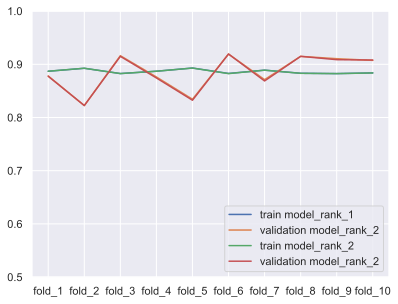

In [32]:
n_folds = ["fold_"+str(i) for i in range(1,n_cv+1)]
y1 = to_plot[to_plot["model_rank"]=="model_rank_1"]["train_score"]
y2 = to_plot[to_plot["model_rank"]=="model_rank_1"]["validation_score"]
plt.plot(n_folds,y1, label = "train model_rank_1")
plt.plot(n_folds,y2, label = "validation model_rank_2")

y3 = to_plot[to_plot["model_rank"]=="model_rank_2"]["train_score"]
y4 = to_plot[to_plot["model_rank"]=="model_rank_2"]["validation_score"]
plt.plot(n_folds,y3, label = "train model_rank_2")
plt.plot(n_folds,y4, label = "validation model_rank_2")

plt.ylim([0.5, 1])
plt.legend(loc="lower right")

##### Understanding LogisticRegression

In [33]:
model = best_model[-1]

In [34]:
model

LogisticRegression(penalty='none')

In [35]:
# coeficientes
print('b0',model.intercept_[0])
for i,coef in enumerate(model.coef_[0]):
    print(f'b{i+1}',coef)

b0 0.11440994301317052
b1 -0.9418854268279409
b2 -1.036430938634815
b3 1.8049331531740576
b4 1.3227215502842968
b5 -0.15235430224139596
b6 0.302775224910587
b7 -0.03601097965602042


<AxesSubplot:>

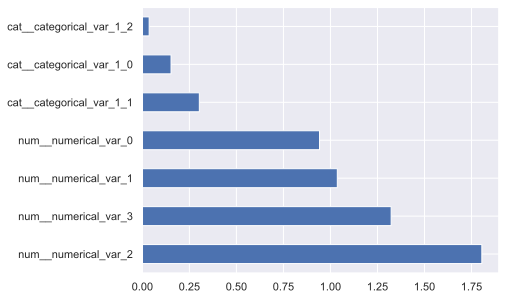

In [36]:
# feature importance
features_model = best_model.named_steps["preprocessor"].get_feature_names_out()
(pd.Series(np.abs(model.coef_[0]), index=features_model)
            .nlargest(20)
            .plot(kind='barh'))

#### Predictions

In [37]:
# prediction classes
y_pred = search.predict(X_test)

# prediction probabilities
y_pred_proba = search.predict_proba(X_test)

In [38]:
y_pred[0:5]

array([0, 1, 0, 1, 1])

In [39]:
y_pred_proba[0:5]

array([[0.59600098, 0.40399902],
       [0.04598304, 0.95401696],
       [0.70826667, 0.29173333],
       [0.10290809, 0.89709191],
       [0.00657961, 0.99342039]])

#### Performance metrics

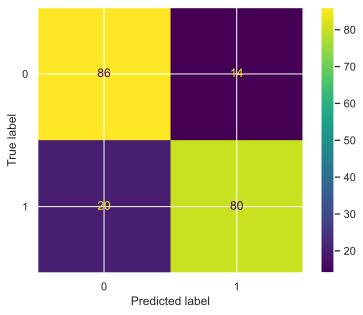

In [40]:
cm = confusion_matrix(y_test, y_pred, labels=model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=model.classes_)
disp.plot()

plt.show()

In [41]:
print(classification_report(y_test, y_pred, target_names=['1','0']))

              precision    recall  f1-score   support

           1       0.81      0.86      0.83       100
           0       0.85      0.80      0.82       100

    accuracy                           0.83       200
   macro avg       0.83      0.83      0.83       200
weighted avg       0.83      0.83      0.83       200



model logistic regression score: 0.8863


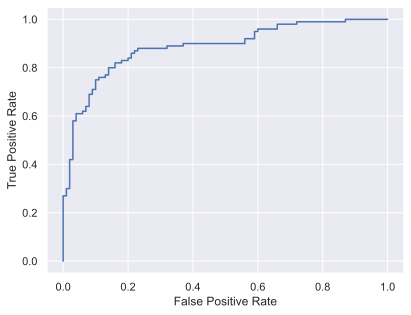

In [42]:
# Roc curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba[:,1])
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
print(f'model logistic regression score: {roc_auc_score(y_test, y_pred_proba[:,1])}')

#### Understanding probabilities

In [43]:
y_pred_proba_df = pd.DataFrame(y_pred_proba, columns = ["pred_0","pred_1"])
y_pred_proba_df["y_pred"] = y_pred
y_pred_proba_df["y_test"] = list(y_test)

In [44]:
y_pred_proba_df.head(5)

,pred_0,pred_1,y_pred,y_test
0,0.596001,0.403999,0,0
1,0.045983,0.954017,1,1
2,0.708267,0.291733,0,0
3,0.102908,0.897092,1,1
4,0.006580,0.993420,1,1


Text(0.5, 1.0, 'Probability distribution of classes')

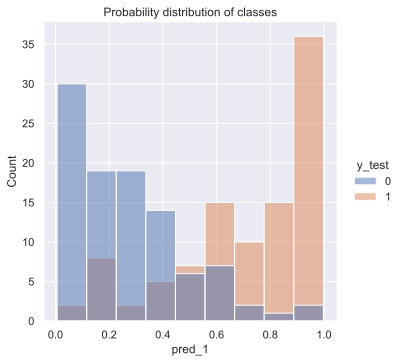

In [45]:
sns.displot(y_pred_proba_df[["pred_1","y_test"]], x="pred_1", hue="y_test")
plt.title("Probability distribution of classes")

On summary:
- For logistic regression it is necessary to remove correlated variables
- The most sophisticated way to make a model is using `Pipeline` and `GridSearchCV` but the other ways are not wrong.
- One of the most important objectives of doing a hyperparameter search is to avoid overfitting, that is, that the model overlearns.
- A good way to identify if there is overfitting is to see a very large distance between training and validation.
- The choice of number of folds will be directly related to the number of rows we have in both classes, the less data we have, the fewer folds we can do. There is no stipulated rule.